# Python MAGIC EMT tutorial

## MAGIC (Markov Affinity-Based Graph Imputation of Cells)

- MAGIC imputes missing data values on sparse data sets, restoring the structure of the data
- It also proves dimensionality reduction and gene expression visualizations
- MAGIC can be performed on a variety of datasets
- Here, we show the effectiveness of MAGIC on epithelial-to-mesenchymal transition (EMT) data
    
Markov Affinity-based Graph Imputation of Cells (MAGIC) is an algorithm for denoising and transcript recover of single cells applied to single-cell RNA sequencing data, as described in Van Dijk D et al. (2018), Recovering Gene Interactions from Single-Cell Data Using Data Diffusion, Cell https://www.cell.com/cell/abstract/S0092-8674(18)30724-4.

### Table of Contents

<a href='#install'>Installation</a>
<br/>
<a href='#data'>Loading data</a>
<br/>
<a href='#pre'>Data preprocessing</a>
<br/>
<a href='#magic'>Running MAGIC</a>
<br/>
<a href='#magic2'>Visualizing MAGIC-ed data</a>


<a id="install"></a>

### Installation 

#### Installation with pip

To install with `pip`, run the following from a terminal:

        pip install --user git+git://github.com/KrishnaswamyLab/MAGIC.git#subdirectory=python

#### Installation from GitHub

To clone the repository and install manually, run the following from a terminal:

        git clone git://github.com/KrishnaswamyLab/MAGIC.git
        cd MAGIC/python
        python setup.py install --user

### Importing MAGIC

Here, we'll import MAGIC along with other popular packages that will come in handy.

In [1]:
import magic

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

<a id="data">### Loading Data

Load your data using one of the following magic.io methods: load_csv, load_tsv, load_fcs, load_mtx, load_10x


In [2]:
emt_data = magic.io.load_csv('MAGIC/data/HMLE_TGFb_day_8_10.csv.gz')

<a id="data"></a>

### Data Preprocessing

The EMT example data we are using is already nicely distributed, so we will only demonstrate these preprocessing steps, and not actually preform them on the data. However, these steps are essential for preforming MAGIC on raw data, so don't skip them. 

#### Filtering your data

After loading your data, you're going to want to determine the molecule per cell and molecule per gene cutoffs with which to filter the data, in order to remove lowly expressed genes and cells with a small library size.


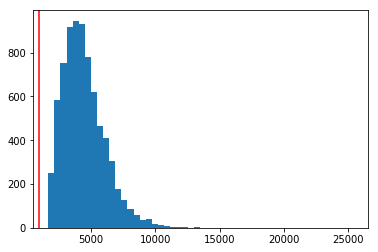

In [3]:
libsize = emt_data.sum(axis=1)
plt.hist(libsize, bins=50)
plt.axvline(1000, c='r')
plt.show()

In [4]:
if False:
    emt_data = emt_data.loc[libsize < 1000]

#### Normalizing your data

After filtering, the next steps are to preform library size normalization and element-wise square root operations on the data.

In [5]:
emt_data_norm = magic.preprocessing.library_size_normalize(emt_data)

if False:
    emt_data_norm = np.sqrt(emt_data_norm)

<a id="magic"></a>

### Running MAGIC

Now that your data has been preprocessed, you are ready to run MAGIC.

#### Creating the MAGIC operator

If you don't specify any parameters, the following line creates an operator with the following default values: k=5, a=15, t='auto', n_pca=100

In [6]:
magic_op = magic.MAGIC()

#### Running MAGIC with gene selection

The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with 'all_genes'.

In [7]:
emt_data_magic = magic_op.fit_transform(emt_data_norm, genes=['VIM', 'CDH1', 'ZEB1'])

Calculating MAGIC...
Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 10.31 seconds.
Calculating KNN search...
Calculated KNN search in 6.29 seconds.
Calculating affinities...
Calculated affinities in 0.75 seconds.
Calculated graph and diffusion operator in 18.47 seconds.
Calculating imputation...
Automatically selected t = 7
Calculated imputation in 1.25 seconds.
Calculated MAGIC in 24.89 seconds.


/home/dager/.local/lib/python3.6/site-packages/magic-1.0.0-py3.6.egg/magic/magic.py:492: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if genes == "pca_only":


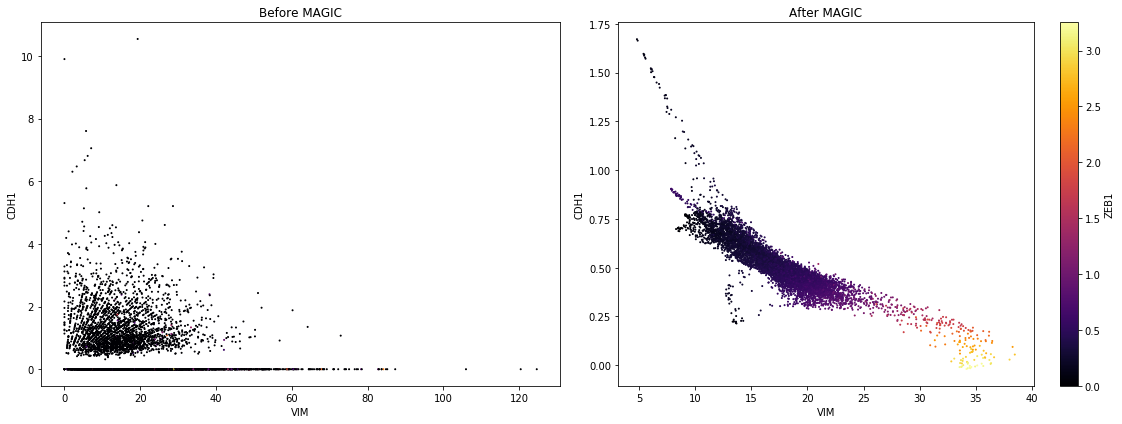

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
points1 = ax1.scatter(emt_data_norm['VIM'], emt_data_norm['CDH1'], c=emt_data_norm['ZEB1'], cmap='inferno', s=1)
ax1.set_xlabel('VIM')
ax1.set_ylabel('CDH1')
ax1.set_title('Before MAGIC')

points2 = ax2.scatter(emt_data_magic['VIM'], emt_data_magic['CDH1'], c=emt_data_magic['ZEB1'], cmap='inferno', s=1)
ax2.set_xlabel('VIM')
ax2.set_ylabel('CDH1')
ax2.set_title('After MAGIC')

plt.colorbar(points1, label='ZEB1')
plt.tight_layout()

plt.show()


#### Setting the MAGIC operator parameters

If you did not specify any parameters for your MAGIC operator, you change do so without going through the hassle of creating a new one using the magic_op.set_params method. Since our example EMT dataset is rather large, we can set k=15, rather than the default k=5. 



In [9]:
magic_op.set_params(k=15)

MAGIC(a=15, k=15, knn_dist='euclidean', n_jobs=1, n_pca=100,
   random_state=None, t='auto', verbose=1)

We can now run MAGIC on the data again with the new parameters. Given that we have already fitted our MAGIC operator to the data, we should run the magic_op.transform method.

In [10]:
emt_data_magic2 = magic_op.transform(emt_data_norm, genes=['VIM', 'CDH1', 'ZEB1'])

Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 10.77 seconds.
Calculating KNN search...
Calculated KNN search in 7.04 seconds.
Calculating affinities...
Calculated affinities in 0.57 seconds.
Calculated graph and diffusion operator in 19.71 seconds.
Calculating imputation...
Automatically selected t = 7
Calculated imputation in 1.54 seconds.


/home/dager/.local/lib/python3.6/site-packages/magic-1.0.0-py3.6.egg/magic/magic.py:492: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if genes == "pca_only":


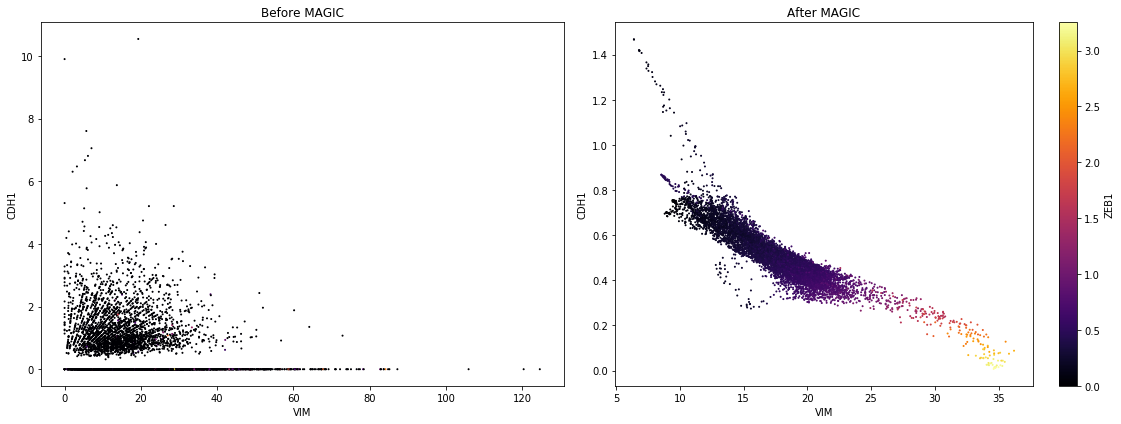

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
points1 = ax1.scatter(emt_data_norm['VIM'], emt_data_norm['CDH1'], c=emt_data_norm['ZEB1'], cmap='inferno', s=1)
ax1.set_xlabel('VIM')
ax1.set_ylabel('CDH1')
ax1.set_title('Before MAGIC')

points2 = ax2.scatter(emt_data_magic2['VIM'], emt_data_magic2['CDH1'], c=emt_data_magic2['ZEB1'], cmap='inferno', s=1)
ax2.set_xlabel('VIM')
ax2.set_ylabel('CDH1')
ax2.set_title('After MAGIC')

plt.colorbar(points1, label='ZEB1')
plt.tight_layout()

plt.show()

<a id="magic2"></a>

### Visualizing MAGIC values with PCA

In [12]:
data_all_genes = magic_op.transform(genes='all_genes')

In [13]:
from sklearn.decomposition import PCA
data_magic_pca = PCA(2).fit_transform(data_all_genes)

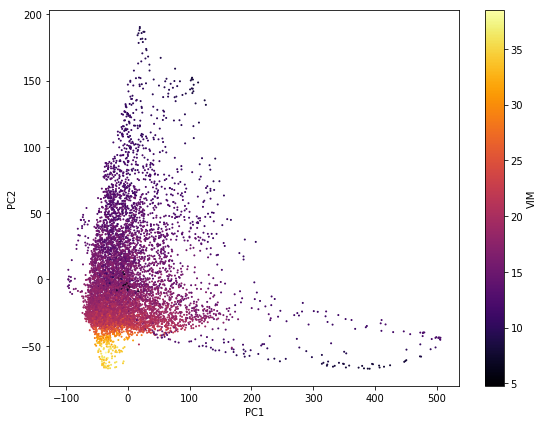

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
points1 = ax.scatter(data_magic_pca[:,0], data_magic_pca[:,1], c=emt_data_magic['VIM'], cmap='inferno', s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(points1, label='VIM')
plt.tight_layout()

plt.show()